# Spam Detector Classifcation Model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Dataset

In [3]:
data = pd.read_csv("spam.csv", encoding="latin-1")
data.columns = ["label", "message"]

data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Preprocessing

In [4]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

X = data["message"]
y = data["label"]

data.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Split the Data Into Testing and Training

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model

In [6]:
vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
extracted_X_train = vectorizer.fit_transform(X_train)

tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}
model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(extracted_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

# Predicting the Data

In [7]:
y_pred = model.predict(vectorizer.transform(X_test))

# Conduct Accuracy and Report

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 99.19
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       0.99      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



# Classifying the Data

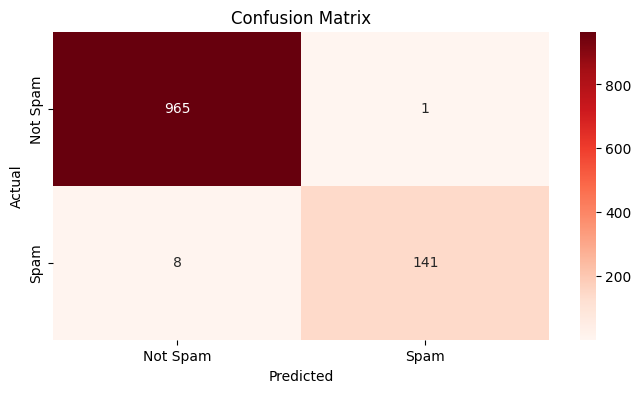

In [9]:
matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# Model Prediction

In [16]:
new_email = ["Congratulations! You won a FREE $500 Gift Card!"]

new_email_features = vectorizer.transform(new_email)

prediction = model.predict(new_email_features)

if prediction[0] == 1:
    print("Prediction: Spam Detected")
else:
    print("Prediction: Not Spam")

Prediction: Spam Detected
